In [1]:
# Linear regression - Ordinary Least Squares¶

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math, Latex

%matplotlib inline

# let k=0,1,  noiseless representation 
K= 2; M = K;  theta0 = np.pi/10; theta1 = np.pi*np.pi; 

$\bf{y} = \pmb{\theta}(\bf{x}) ,   \quad \pmb{\theta}=[\theta_k:k\in K]\in\mathbb{R}^{K}$

In [2]:
display(Math(r'\theta_1= '),theta1,Math(r'\theta_0='),theta0)

<IPython.core.display.Math object>

9.869604401089358

<IPython.core.display.Math object>

0.3141592653589793

In [3]:
print('Measured noiseless values')
X = np.random.rand(2,1)
y = theta0 + theta1 * X 
print( y.T,'=','theta1',X.T,'+theta0' )

Measured noiseless values
[[3.91928294 5.85860624]] = theta1 [[0.3652754  0.56176993]] +theta0


$theta1 = \frac{y[0]-y[1]}{X[0]-X[1]},\quad theta0  = y[1] -theta1 * X[1] $

In [4]:
theta1_est = (y[0]-y[1])/(X[0]-X[1]); theta0_est= y[1] -theta1_est * X[1] 
print('theta0=',theta0_est,'   theta1=', theta1_est )
# newly encoding
X_b = np.c_[np.ones((2,1)),X]
Theta= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # (multiplicative) inverse of a matrix.
print('Theta=',Theta.T)

theta0= [0.31415927]    theta1= [9.8696044]
Theta= [[0.31415927 9.8696044 ]]


In [5]:
# noisy values
print('Measured noisy values')
M = 512;  theta1 = np.pi*np.pi; theta0 = np.pi/10; sigma= 1

Measured noisy values


$\bf{y} = \pmb{\theta}(\bf{x})+  {\sigma}\pmb{\epsilon},   \quad \sigma\in\mathbb{R}^{+}$

In [6]:
print(r'$\Theta$= ',theta1,theta0)
X = np.random.rand(M,1)
y =  theta1 * X + theta0 + sigma*np.random.randn(M,1)

$\Theta$=  9.869604401089358 0.3141592653589793


In [7]:
# averaging over all pairs
th = [0] * 1; cont= 0; 
for m in range(M):
    for n in range(m+1,M):
        cont = cont +1
        X2 = np.array([X[n],X[m]])
        y2 = np.array([y[n],y[m]])
        X_b = np.c_[np.ones((2,1)),X2]
        Theta= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y2)  # (multiplicative) inverse of a matrix.
        th = th + Theta
th = th/cont
print(th[1],th[0])

[188.03806817] [-10.21636112]


### Ordinary Least Squares

$\begin{align*}
\min_{\bf{W}}\frac{1}{2}\mid\mid\bf{W}^{\top}\bf{x} - \hat{\bf{y}}\mid\mid^{2}_2, &\qquad\textrm{  Residual Sum of Squares}\\
\hat{\theta}_1 =\frac{(\sum y)(\sum x^{2}) - (\sum x)(\sum xy)}{n(\sum x^{2})-(\sum x^{2})}&\qquad
\hat{\theta}_0  =\frac{n(\sum xy)- (\sum x)(\sum y)}{n(\sum x^{2})-(\sum x^{2})} 
\end{align*}
$

In [8]:
# including all noisy measures
M = 512
X_b = np.c_[np.ones((M,1)),X]
y =  theta1 * X + theta0 + sigma*np.random.randn(M,1)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
Xp = np.linspace(0, 1, M,  endpoint=False)
y2 = th[1]*Xp + th[0]
yall = theta_best[1]*Xp + theta_best[0]
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict[1],y_predict[0])

[19.74420669] [0.32484701]


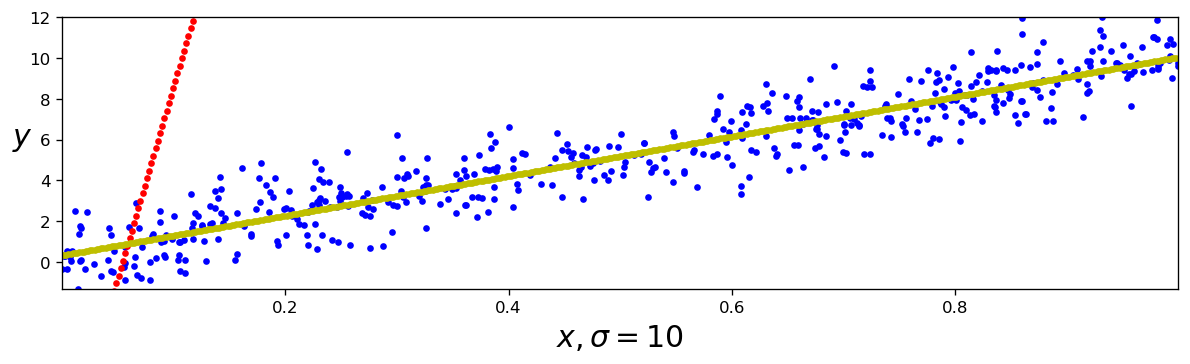

In [9]:
figure(figsize=(12, 3), dpi=120)
plt.plot(X,y,'b.')
plt.plot(Xp,y2,'r.')
plt.plot(Xp,yall,'y.')
plt.xlabel("$x, \sigma=10$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([min(X),max(X),min(y),max(y)])
plt.show()

## Gaussian Maximum Likelihood Estimation 
$\begin{align}
x\sim\mathcal{N}_x(\mu_x,\sigma_x^{2}),&\quad y\sim \mathcal{N}_y(\mu_y,\sigma_y^{2}) = \mathcal{N}_y(\bf{W}^{\top}\bf{x},\sigma_y^{2}) \\
\hat{\bf{W}}_{MLE} &=\arg\max_{\bf{W}} \mathcal{N}_y(\hat{\bf{y}}\mid\bf{W}^{\top}\bf{x},\sigma_y^{2})\sim \arg\max_{\bf{W}} \ln \mathcal{N}_y(\hat{\bf{y}}\mid\bf{W}^{\top}\bf{x},\sigma_y^{2})\\
\hat{\bf{W}}_{MLE} &=\arg\max_{\bf{W}} \frac{1}{2}(\bf{W}^{\top}\bf{x} -\hat{\bf{y}})^{2} = \min_{\bf{W}}\frac{1}{2}\mid\mid\bf{W}^{\top}\bf{x} - \hat{\bf{y}}\mid\mid^{2}_2
\end{align}
$

Maximum Likelihood Estimation  on Gaussian pdf is the  estimate of  Mean Least Squares!